<a id='top'></a>

# CSCI 3022: Intro to Data Science - Spring 2019 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday March 4**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Tyler Valentine

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [47]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [30 points] Problem 1: The Game of Strife

Below, and at the [link here](http://www.cs.colorado.edu/~tonyewong/home/resources/game_of_strife.png), you will find the board for the ***Game of Strife***, a simplified and slightly more depressing version of the [Game of Life](https://en.wikipedia.org/wiki/The_Game_of_Life). Here are some rules:

- Players begin at START and may choose to begin the game by either going to college (moving to the right from START) or starting a career (moving downward from START). Players then move along the game board in order of increasing tile number. 
    - If a player begins by going to college, then they start the game with -\$20,000. That is indeed negative money, to account for student loan debt.
    - If a player begins by starting a career, then they start the game with \$5,000.

<p> </p>

- At the beginning of a player's turn, they roll a fair 6-sided die, the outcome of which determines how many tiles they move forward.

<p> </p>

- When a player reaches a red square (tiles 9, 17 or 30), they must stop at that square for the rest of their turn, even if they would not have landed on the red square.
    - When a player stops on the CAREER tile after college (square 9), they are randomly assigned a career and salary from the possibilities: \$50,000, \$70,000, \$90,000, \$110,000, or \$130,000 (all with equal probability). The player's actual career is irrelevant to the game, but please make something up so you are emotionally invested in the game.
    - If a player starts a career at the beginning of the game, they are assigned a salary randomly from possibilities \$40,000, \$50,000, \$60,000, \$70,000, or \$80,000.
    - When a player stops on the HOUSE tile, they put a down payment on a house. This down payment is drawn randomly from the set \$25,000, \$40,000, \$55,000 or \$70,000.
    - When a player stops on the RETIRE tile, the player collects a pension equal to half their salary and then the game ends immediately.

<p> </p>

- When a player lands on or passes a PAYDAY square, they earn money equal to their salary.

<p> </p>

- When a player lands on a STRIFE square (1, 4, 7, 13, 18, 23 or 29 if they go to college, or 2, 7, 13, 18, 23 or 29 if they start a career immediately at the beginning of the game), they draw a STRIFE card. The STRIFE cards have the player earn \$5,000 or \$10,000, or lose \$1,000, \$2,000 or \$5,000.

<p> </p>

- Players can have negative money, which corresponds to being in debt.


<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/game_of_strife.png" style="width: 700px;"/>

**Part A:** Write code to simulate an entire game of the Game of Strife (with only one player). You may **not** have two separate routines for simulating the game, or a turn, depending on whether a player goes to college or starts a career at the beginning; both possibilities should be accounted for within your one set of codes.

Then run two ensembles of at least 10,000 games, one where the player starts by going to college, the other where the player starts a career immediately. Plot density histograms of the players' ending distributions of money on the same set of axes. Be sure to label your axes, include a legend and make your histogram box faces slightly transparent, so both sets of data are visible.

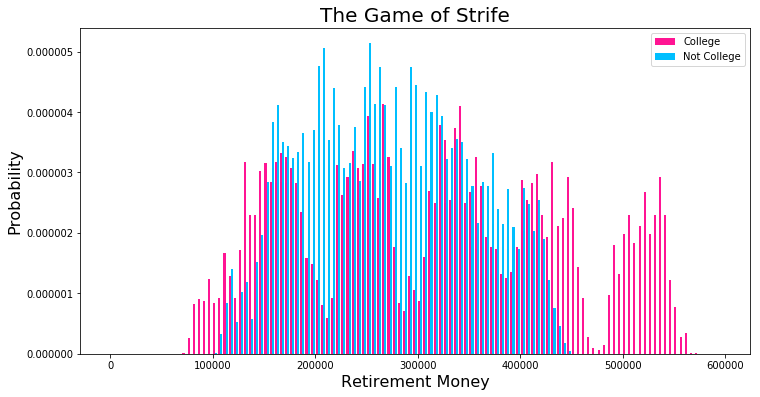

In [48]:
#uInput = ""
#c = False
#while (uInput != 'y' and uInput != 'n'):
    #print ("Welcome to The Game of Strife!")
    #print ("Would you like to attend college to college (y/n)")
    #uInput = input()
    #if (uInput != 'y' and uInput != 'n'):
        #print("Uhhh... maybe college isn't for you. You're jumping right into the workforce!")
        #uInput = 'n'
    #elif (uInput == 'y'):
        #print("College Rules!")
        #c = True
    #else:
       #print("Yeah, College is hard")
    
def strife(c):
    die5 = [1,2,3,4,5]
    die6 = [1,2,3,4,5,6]
    salary = 0
    money = -20000
    prevSquare = 0
    square = 0
    strifeCard = [-1000, -2000, -5000, 5000, 10000]
    house = [25000, 40000, 55000, 70000]
    strifed = False
    
    if (c == False):
        money = 5000
        carRoll = np.random.choice(die5)
        if (carRoll == 1):
            salary = 40000
            #print("Well, I guess the world needs another SOUND ENGINEER. You now earn ", salary, "dollars a year")
        
        elif (carRoll == 2):
            salary = 50000
            #print("Homer Simpson would be proud. You're a NUCLEAR TECHNICIAN. You now earn", salary, "dollars a year")
        
        elif (carRoll == 3):
            salary = 60000
            #print("Nerd! You're the company IT PRO and you're earning", salary, "dollars a year")
            
        elif (carRoll == 4):
            salary = 70000
            #print("You're living out your dream being a TOUR GUIDE in Hawaii. You now earn", salary, "dollars a year")
            
        elif (carRoll == 5):
            salary = 80000
            #print("You were never good in school... but you've got talent! You're a PORN STAR and you earn", salary, "dollars a year")
        
        while (square < 10):
            prevSquare = square
            square = square + np.random.choice(die6)
            if (prevSquare < 4 and square >= 4):
                money = money + salary
            if (prevSquare < 10 and square >= 10):
                money = money + salary
            if (square == 2 or square == 7 or square == 13):
                money = money + np.random.choice(strifeCard) #draw a strife card
                strifed = True
                #print("strife")
    else:
        while(square < 9):
            prevSquare = square
            square = square + np.random.choice(die6)
            if (square >= 9):
                square = 9
                carRoll = np.random.choice(die5)
                if (carRoll == 1):
                    salary = 50000
                    #print("You should have tried harder in school. You're a DATA INPUT DRONE and you earn", salary, "dollars a year")
                
                elif (carRoll == 2):
                    salary = 70000
                    #print("You want to shape the lives of young people. You're a teacher and you earn", salary, "dollars a year")
                
                elif (carRoll == 3):
                    salary = 90000 
                    #print("You love the excitment of the market! You are a STOCK BROKER and you earn", salary, "dollars a year")
                
                elif (carRoll == 4):
                    salary = 110000
                    #print("Saving lives and taking care of others has always been in your blood. You're a REGISTERED NURSE and you earn", salary, "dollars a year")
                
                elif (carRoll == 5):
                    salary = 130000
                    #print("I like computers! You're a talented software engineer and astropysicist so you become a SPACE PORN STAR and you earn", salary, "dollars a year")
            elif (square == 1 or square == 4 or square == 7):
                money = money + np.random.choice(strifeCard)
                strifed = True
                #print("strife")
            
    while (square < 30):
        prevSquare = square
        square = square + np.random.choice(die6)
        if (square >= 30):
            money = money + (salary/2)
            return money
        
        elif (prevSquare < 17 and square >= 17):
            square = 17
            housePrice = np.random.choice(house)
            money = money - housePrice
        
        if ((prevSquare < 10 and square >= 10) or (prevSquare < 16 and square >= 16) or (prevSquare < 22 and square >= 22) or (prevSquare < 27 and square >= 27)):
            money = money + salary
        
        if (square == 13 or square == 18 or square == 23 or square == 29):
            money = money + np.random.choice(strifeCard)
            strifed = True

#print(strife(False))
#print(strife(True))
    
college = []
noCollege = []

for i in range (10000):
    colRes = strife(True)
    noRes = strife(False)
    college.append(colRes)
    noCollege.append(noRes)

college = np.array(college)
noCollege = np.array(noCollege)


fig, ax = plt.subplots(figsize=(12,6))
ax.set_title("The Game of Strife", fontsize=20)
ax.set_xlabel("Retirement Money", fontsize=16)
ax.set_ylabel("Probability", fontsize=16)
my_bins = range(0,600000,5000)
colors = ['deeppink', 'deepskyblue']
plt.hist([college, noCollege], my_bins, histtype = 'bar', density = True, color = colors)

legend = ax.legend(["College","Not College"])

            
        
    
            
    

**Part B:** Use concepts from class to describe the two distributions of player cash at retirement, depending on whether or not they went to college or immediately started a career. How are the two distributions similar? How do they differ? Address characteristics like skew, modality, central tendency and spread. How could the rules of the Game of Strife account for these differences?

In [49]:
print("Skew for college strifers is:") 
print(stats.skew(college))
print("Skew for non-college strifers is:")
print(stats.skew(noCollege))
print("Variance for college strifers is:") 
print(np.var(college))
print("Variance for non-college strifers is:")
print(np.var(noCollege))
print("Most common retirement money amount for college strifers is:") 
print(stats.mode(college))
print("Most common retirement money amount for non-college strifers is:")
print(stats.mode(noCollege))
print("Median retirement for college strifers:")
print(np.median(college))
print("Median retirement for non-college strifers:")
print(np.median(noCollege))
print("Maximum retirement money amount for college strifers:")
print(np.max(college))
print("Maximum retirement money amount for non-college strifers:") 
print(np.max(noCollege))
print("Minimum retirement money amount for college strifers:")
print(np.min(college))
print("Minimum retirement money amount for non-college strifers:")
print(np.min(noCollege))
spreadCollege = (np.max(college) - np.min(college))
spreadnoCollege = (np.max(noCollege) - np.min(noCollege))
print("Spread for college strifers:")
print(spreadCollege)
print("Spread for non-college strifers:")
print(spreadnoCollege)

Skew for college strifers is:
0.13724075929257923
Skew for non-college strifers is:
0.10168096251515357
Variance for college strifers is:
16351090686.71
Variance for non-college strifers is:
6494242075.59
Most common retirement money amount for college strifers is:
ModeResult(mode=array([270000.]), count=array([110]))
Most common retirement money amount for non-college strifers is:
ModeResult(mode=array([250000.]), count=array([162]))
Median retirement for college strifers:
315000.0
Median retirement for non-college strifers:
265000.0
Maximum retirement money amount for college strifers:
570000.0
Maximum retirement money amount for non-college strifers:
445000.0
Minimum retirement money amount for college strifers:
73000.0
Minimum retirement money amount for non-college strifers:
104000.0
Spread for college strifers:
497000.0
Spread for non-college strifers:
341000.0


As one might expect strifers who went to college represented the top end of the spectrum when it came to retirement money. They also represented the lowest value -- probably because of debt and a bad career role.
We can see from the data that there was a positive skew for both scenerios, however, it was more heavily weighted towards positive for the college strifers. This indicates that there was a heavier distribution in the higher retirement amounts for the college educated strifers. The rules of the game were such that unless players were unluck on both their career and house roles, they would have a good chance of being at or above the median.
The mode for both college and non-college strifers fell somewhere near the median which is expected, the bins close to the median typically accumulated the most strifers as it took a less likely series of events to move towards the extremes. It is worth noting the disparity between the central tendency of the two groups however. The college strifers had a more even distribution out near their min and max values. This is likely because of the large gaps between earnings for the college jobs combined with the debt incurred at the beginning of the game. Similarly spread was much larger for the college strifers, again because of the inital debt that put them $25000 in the hole and the gap between the best jobs and the worst jobs.

**Part C:**  Use your results from Part A to estimate the probability that a person would retire with at least \$300,000, if they went to college.

In [50]:
c = 0
for i in range (len(college)):
    if (college[i] >= 300000):
        c += 1

probC = c/len(college)

print(probC)


        

0.531


**Part D:** The United States [Bureau of Labor Statistics](https://www.bls.gov/news.release/hsgec.nr0.htm) has found that approximately 66.7% of students go to college. Suppose players of the Game of Strife choose to go to college at the beginning of the game with this probability of $P(\text{college}) = 0.667$.

Use your two ensembles of games from Part A to estimate the probability that an individual, whose college education status is unknown, will retire in the Game of Strife with at least \$300,000. State any relevant probability laws, theorems or rules that you use, and show all calculations.

In [51]:
c = 0
nc = 0

for i in range(10000):
    if (college[i] >= 300000):
        c += 1
    if (noCollege[i] >= 300000):
        nc += 1

prob300k = round((c*.667 + nc*.333)/100,2)

print("There is a", prob300k, "percent chance that a player will retire with $300,000 given a 66.7% chance of going to college")
        




There is a 48.06 percent chance that a player will retire with $300,000 given a 66.7% chance of going to college


This code utilizes the Law of Total Probability.

Probability of retiring with 300,000 dollars is equal to the probability of retiring with 300,000 dollars given that a player went to college times the probability they went to college plus the probability of retiring with 300,000 dollars given that they didnt go to college times the probability that they didnt go to college.

Or:

P(R300k) = P(R300k|C) * P(C) + P(R300k|NC) * P(NC)

**Part E:** Let's see how important the Strife tiles are in affecting a player's final money. What is the probability that a player ends the game with at least \$300,000 in cash if they landed on at least one Strife square? You may want to modify your previous codes to run additional simulations for this part. Use the same method as Part D to address the proportion of players who begin by going to college versus starting a career.

In [52]:
cCount = 0
ncCount = 0

def strife(c):
    die5 = [1,2,3,4,5]
    die6 = [1,2,3,4,5,6]
    salary = 0
    money = -20000
    prevSquare = 0
    square = 0
    strifeCard = [-1000, -2000, -5000, 5000, 10000]
    house = [25000, 40000, 55000, 70000]
    strifed = False
    
    if (c == False):
        money = 5000
        carRoll = np.random.choice(die5)
        if (carRoll == 1):
            salary = 40000
            #print("Well, I guess the world needs another SOUND ENGINEER. You now earn ", salary, "dollars a year")
        
        elif (carRoll == 2):
            salary = 50000
            #print("Homer Simpson would be proud. You're a NUCLEAR TECHNICIAN. You now earn", salary, "dollars a year")
        
        elif (carRoll == 3):
            salary = 60000
            #print("Nerd! You're the company IT PRO and you're earning", salary, "dollars a year")
            
        elif (carRoll == 4):
            salary = 70000
            #print("You're living out your dream being a TOUR GUIDE in Hawaii. You now earn", salary, "dollars a year")
            
        elif (carRoll == 5):
            salary = 80000
            #print("You were never good in school... but you've got talent! You're a PORN STAR and you earn", salary, "dollars a year")
        
        while (square < 10):
            prevSquare = square
            square = square + np.random.choice(die6)
            if (prevSquare < 4 and square >= 4):
                money = money + salary
            if (prevSquare < 10 and square >= 10):
                money = money + salary
            if (square == 2 or square == 7 or square == 13):
                money = money + np.random.choice(strifeCard) #draw a strife card
                strifed = True
                #print("strife")
    else:
        while(square < 9):
            prevSquare = square
            square = square + np.random.choice(die6)
            if (square >= 9):
                square = 9
                carRoll = np.random.choice(die5)
                if (carRoll == 1):
                    salary = 50000
                    #print("You should have tried harder in school. You're a DATA INPUT DRONE and you earn", salary, "dollars a year")
                
                elif (carRoll == 2):
                    salary = 70000
                    #print("You want to shape the lives of young people. You're a teacher and you earn", salary, "dollars a year")
                
                elif (carRoll == 3):
                    salary = 90000 
                    #print("You love the excitment of the market! You are a STOCK BROKER and you earn", salary, "dollars a year")
                
                elif (carRoll == 4):
                    salary = 110000
                    #print("Saving lives and taking care of others has always been in your blood. You're a REGISTERED NURSE and you earn", salary, "dollars a year")
                
                elif (carRoll == 5):
                    salary = 130000
                    #print("I like computers! You're a talented software engineer and astropysicist so you become a SPACE PORN STAR and you earn", salary, "dollars a year")
            elif (square == 1 or square == 4 or square == 7):
                money = money + np.random.choice(strifeCard)
                strifed = True
                #print("strife")
            
    while (square < 30):
        prevSquare = square
        square = square + np.random.choice(die6)
        if (square >= 30):
            money = money + (salary/2)
            return [money, strifed]
        
        elif (prevSquare < 17 and square >= 17):
            square = 17
            housePrice = np.random.choice(house)
            money = money - housePrice
        
        if ((prevSquare < 10 and square >= 10) or (prevSquare < 16 and square >= 16) or (prevSquare < 22 and square >= 22) or (prevSquare < 27 and square >= 27)):
            money = money + salary
        
        if (square == 13 or square == 18 or square == 23 or square == 29):
            money = money + np.random.choice(strifeCard)
            strifed = True

for i in range (10000):
    c = strife(True)
    if ((c[0] >= 300000) and (c[1] == True)):
        cCount += 1
for i in range (10000):
    nc = strife(False)
    if ((nc[0] >= 300000) and (nc[1] == True)):
        ncCount += 1

prob300kSTR = round((cCount*.667 + ncCount*.333)/100,2)

print("There is a", prob300kSTR, "percent chance that a player will retire with $300,000 given a 66.7% chance that they went to college and that they landed on a STRIFE square at least once")
        

There is a 41.48 percent chance that a player will retire with $300,000 given a 66.7% chance that they went to college and that they landed on a STRIFE square at least once


We are once again using the Law of Total Probability. The return statements and counters were altered to take into account landing on a Strife square.

<br>

---
[Back to top](#top)
<a id='p2'></a>

### [30 points] Problem 2: Sonic or Tails?

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/hedgehog_coin.jpg" style="width: 500px;"/>

In the file `flipadelphia.csv` you will find the results of an experiment that was conducted by Amy, the famous hedgehog data scientist, as she was flipping a coin one sunny day in a meadow. This is no ordinary coin, however: this coin has on one side Sonic, and on the other side Tails! The two sides of this coin are above, and at [this link](http://www.cs.colorado.edu/~tonyewong/home/resources/hedgehog_coin.jpg).

In Amy's experiment she repeatedly flipped the coin until it came up Sonic. After each trial, she recorded her observed value for $X=$ the number of flips required to see the first Sonic. The results are stored in `flipadelphia.csv`.

Amy has a lot of coins for performing cool data science experiments, and these coins have different biases (not all unique). Amy is a forgetful hedgehog, so she isn't sure which coin she was flipping. Her coins have biases of $p_S=.2, .3, .4, .5, .6, .7$ and $.8$, where $p_S$ is the probability of any given flip coming up Sonic.

**Part A:** Read in the data set and make a frequency histogram of the data. Be sure to label your axes appropriately, and center your bins above the integer numbers of flips (0, 1, 2, etc...). What is the name of the distribution for the random variable that Amy observed and recorded in her data table?

,1
0,5
1,1
2,5
3,2
4,2
5,3
6,2
7,1
8,1


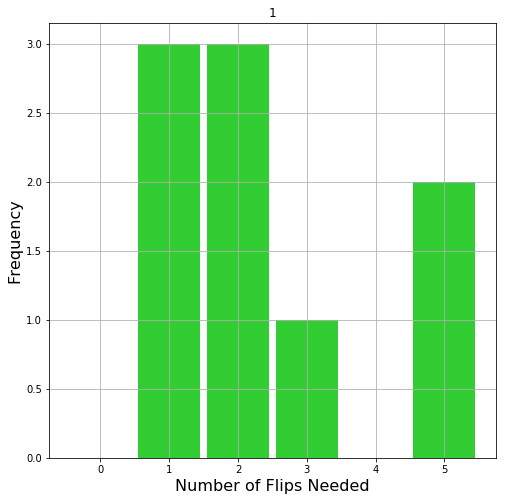

In [53]:
df = pd.read_csv("flipadelphia.csv")
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("The Game of Strife", fontsize=20)
ax.set_xlabel("Number of Flips Needed", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
#my_bins = np.histogram_bin_edges()
my_bins = range(0,7,1)
colors = ['limegreen']
df.hist(ax = ax, bins = my_bins, color = colors, align = 'left', rwidth = .9)

df.head(10)

Because this histogram is representing the number of coin flips needed to observe the first instance of flipping a head, we can say that it is a geometric distribution.

**Part B:** Use the distribution that you identified in Part A to determine $P(X=n \mid p_S=0.5)$, the probability that Amy would observe the first Sonic flip on the $n$-th flip, assuming that the coin is fair ($p_S=0.5$), for each of the $n$ from her 10 trials in her data set. Then, combine these to find the overall *likelihood* that she would observe her entire data set, assuming that the coin was fair. That is, estimate $P(\text{data} \mid p_S=0.5)$. Be sure to note any assumptions you make about how the outcome of one trial relates to the outcomes of the others.

If it helps to have some mathematical notation, consider that Amy's data set consists of the results of all 10 of her trials: $$\text{data} = (X_1 = n_1) \cap (X_2 = n_2) \cap \ldots (X_{10} = n_{10})$$

$P(X = 5 | P_s = 0.5) = (1 - 0.5)^{5-1} * 0.5 = \frac{1}{32}$ 

$P(X = 1 | P_s = 0.5) = (1 - 0.5)^{1-1} * 0.5 = \frac{1}{2}$

$P(X = 5 | P_s = 0.5) = (1 - 0.5)^{5-1} * 0.5 = \frac{1}{32}$ 

$P(X = 2 | P_s = 0.5) = (1 - 0.5)^{2-1} * 0.5 = \frac{1}{4}$ 

$P(X = 2 | P_s = 0.5) = (1 - 0.5)^{2-1} * 0.5 = \frac{1}{4}$ 

$P(X = 3 | P_s = 0.5) = (1 - 0.5)^{3-1} * 0.5 = \frac{1}{8}$

$P(X = 2 | P_s = 0.5) = (1 - 0.5)^{2-1} * 0.5 = \frac{1}{4}$

$P(X = 1 | P_s = 0.5) = (1 - 0.5)^{1-1} * 0.5 = \frac{1}{2}$

$P(X = 1 | P_s = 0.5) = (1 - 0.5)^{1-1} * 0.5 = \frac{1}{2}$

Probability that she would observe her entire data set given that it was a fair coin:

$P(data set | P_s = 0.5) = \frac{1}{32}+\frac{1}{2}+\frac{1}{32}+\frac{1}{4}+\frac{1}{4}+\frac{1}{8}+\frac{1}{4}+\frac{1}{2}+\frac{1}{2} = \frac{1}{4194304}$

Note that each coin flip is independent of the others and that each trial is also independent of the other trials. 

**Part C:** Suppose before we observed Amy's data set, we believe that each of the seven possible coin biases occur with equal probability, $P(p_S)$. This is called the _prior distribution_ for the coin bias, $p_S$, because we have not yet taken into account Amy's data set.
* Now, estimate the probability of each possible bias, given the data: $P(p_S \mid \text{data})$.  This is called the _posterior distribution_ for the coin bias, because it is our assessment of the coin's bias _after_ we have accounted for Amy's data.
* Make a line plot of the bias along x-axis versus the posterior probability of that bias along the y-axis, and be sure to label your axes. 
* Comment on your plot. What appears to be the most probable value for the bias, $p_S$? This is called the _maximum a posteriori_ estimate, because it maximizes the posterior distribution and sounds very, *very* fancy.

[3.22118296e-02 2.18243548e-01 3.91815649e-01 2.72844810e-01
 7.73956838e-02 7.36265198e-03 1.25827459e-04]


Text(0, 0.5, 'Posterior Probability')

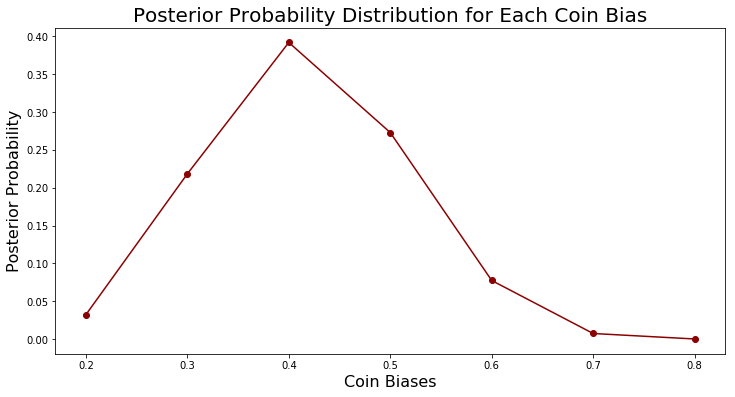

In [54]:
p = [.2,.3,.4,.5,.6,.7,.8]
k = [5,1,5,2,2,3,2,1,1]
m = 1 # probabilities for each value in the dataset
mV = [] # array of probabilities given the dataset for each biased coin 

def prob(p,k): 
    return (1-p)**(k-1) * p

for i in range(len(p)):
    for j in range(len(k)):
        m = m * prob(p[i],k[j])
    mV.append(m)
    m = 1

mV = np.array(mV)
mVsum = np.sum(mV)
LTP = mVsum/7

biasProb = []

for i in range (len(mV)):
    biasProb.append((mV[i]/7)/LTP)

biasProb = np.array(biasProb)

print(biasProb)
#np.sum(biasProb))

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(p,biasProb,color = 'darkred',marker = 'o')
ax.set_title("Posterior Probability Distribution for Each Coin Bias", fontsize=20)
ax.set_xlabel("Coin Biases", fontsize=16)
ax.set_ylabel("Posterior Probability", fontsize=16)



What a plot! I particularly like how I got little circles where the x-axis values are!

From the data, it looks most likely that the coin Amy was flipping (the maximum a posteriori estimate) was the $P_s = 0.4$ coin. There is about a 39% chance that this is the case. 

As an additional note, there was around a 88% chance that she was flipping either the $P_s = 0.3$ coin, the $P_s = 0.4$ coin, or the $P_s = 0.5$ coin.

**Part D:** Now suppose the prior probability distribution of the coins is not uniform. Namely, suppose these probabilities follow a ***triangular distribution***, centered at $p_S=0.5$:
$$P(p_S = p) = \begin{cases} mp & p \leq 0.5 \\ m(1-p) & p > 0.5 \end{cases}$$

Determine what value the constant $m$ should have in order to make $P(p_S = p)$ is a valid probability mass function. Remember, $p_S \in \{.2, .3, \ldots , .7, .8\}$ and is discrete.

In [55]:
p = [.2,.3,.4,.5,.6,.7,.8]
x = .2+.3+.4+.5+(1-.6)+(1-.7)+(1-.8) # this all needs to equal 1
#print(x)
mD = 1/x
print("The value of m is", mD, "or 10/23")

    

The value of m is 0.4347826086956522 or 10/23


**Part E:** Compare, using words, the triangular prior distribution (this part) and the uniform prior distribution (from Part C).  What does each represent in terms of our _prior_ knowledge of the coin bias?

In part C there was an equal chance of a given coin being selected. In part D, the fair coin has the highest chance of being selected as 0.5 * m will be the largest value. For every value in 0.1 increments from 0.5 the value will decrease evenly in the positive and negative direction (0.4 and (1-0.6) are the same). Thus, if the chance of selection follows our triangular distribution we know there is a better chance of the 0.5 coin, and to a lesser extent the coins around it, being selected. Conversly, if the coins follow the distribution from part C there will be an equal chance of any coin being selected.   

**Part F:** Modify your calculation of the posterior distribution from Part C to use the new triangular prior distribution from Part D. Make a plot of the results that includes both posterior distribution using the uniform prior (from Part C) and the posterior distribution using the triangular prior (from Part D) in the same figure panel. Be sure to label your axes and include a legend.

[0.016176430708762173, 0.16439930667266708, 0.3935311208631256, 0.3425492444824444, 0.07773454239271618, 0.0055461656978284335, 6.318918245610202e-05]


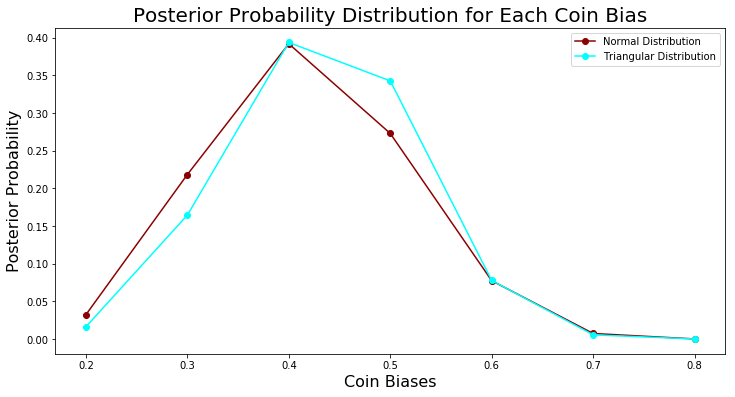

In [56]:
pF = [.2,.3,.4,.5,.6,.7,.8]
kF = [5,1,5,2,2,3,2,1,1]
probs = [.2,.3,.4,.5,.4,.3,.2]
mF = 1 # probabilities for each value in the dataset
mVF = [] # array of probabilities given the dataset for each biased coin 

def prob(p,k): 
    return (1-p)**(k-1) * p

for i in range(len(pF)):
    for j in range(len(kF)):
        mF = mF * prob(pF[i],kF[j])
    mVF.append(mF)
    mF = 1

mVF = np.array(mVF)
LTPF = 0

for i in range (len(mVF)):
    LTPF = LTPF + (mVF[i]*(mD*probs[i]))

biasProbF = []

for i in range (len(mVF)):
    biasProbF.append((mVF[i]*(mD*probs[i]))/LTPF)

print(biasProbF)

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(p,biasProb,color = 'darkred',marker = 'o')
plt.plot(pF,biasProbF,color = 'cyan', marker = 'o')
ax.set_title("Posterior Probability Distribution for Each Coin Bias", fontsize=20)
ax.set_xlabel("Coin Biases", fontsize=16)
ax.set_ylabel("Posterior Probability", fontsize=16)

plt.legend(['Normal Distribution','Triangular Distribution'])




**Part G:** Comment on the effect of your choice of different prior distribution on your posterior inference for the most probable coin bias.

Given a normal distribution, the 0.4 coin has the highest chance of being the coin that was selected with the odds of 0.5 and 0.3 tailing off fairly dramtically. Given a triangular distribution 0.4 is still the most likely coin but the chances that 0.5 was was the coin selected are raised significantly. I both cases the odds of 0.2, 0.6, 0.7 or, 0.8 being selected remain very low.

<br>

---
[Back to top](#top)
<a id='bot'></a>